Matplotlib is building the font cache; this may take a moment.


Dataset created successfully!


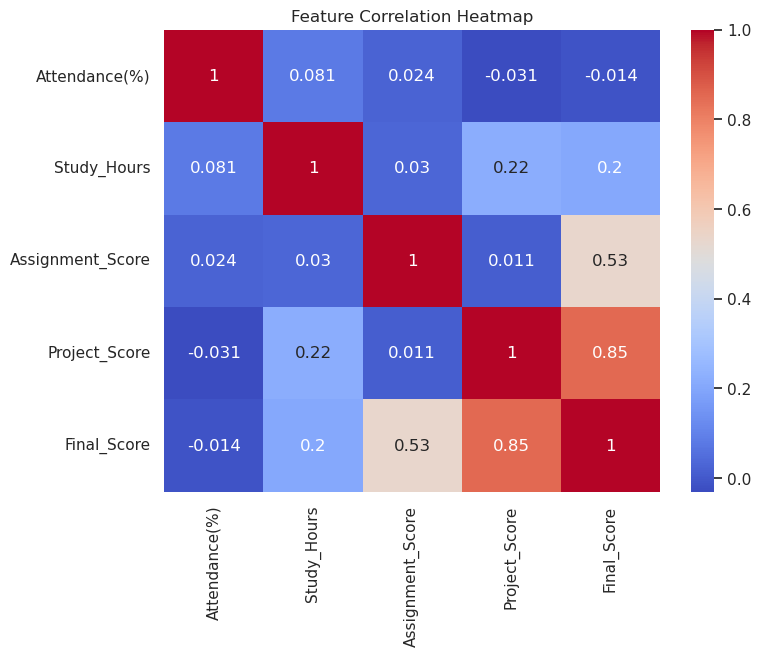

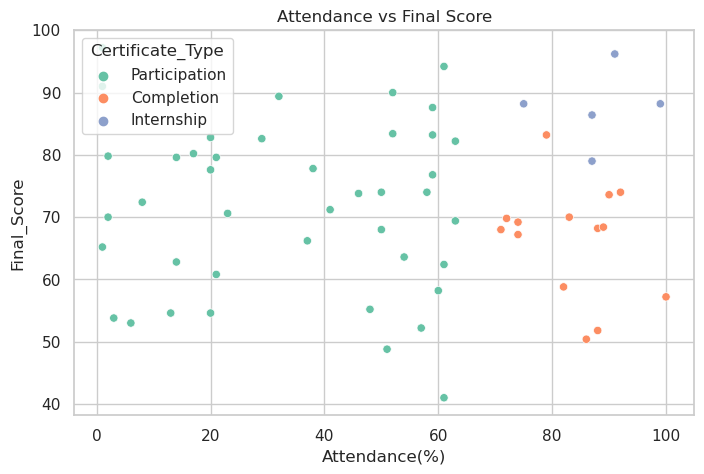

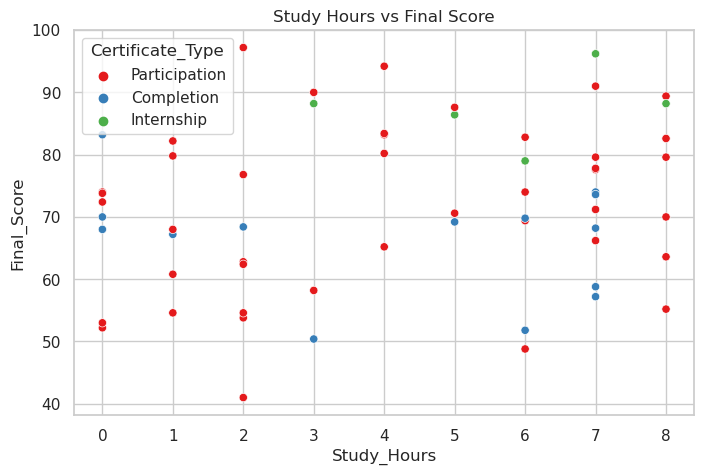

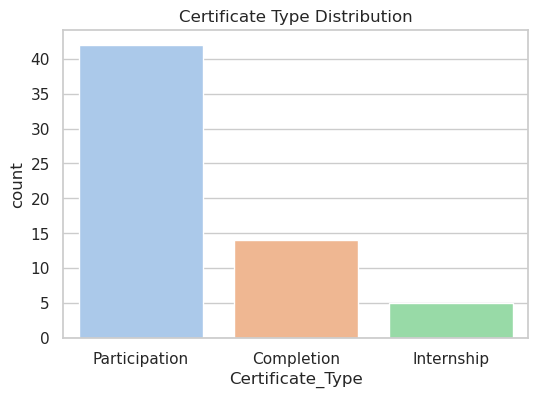

=== Logistic Regression Classification ===
Accuracy: 0.9230769230769231
               precision    recall  f1-score   support

   Completion       1.00      1.00      1.00         1
   Internship       0.50      1.00      0.67         1
Participation       1.00      0.91      0.95        11

     accuracy                           0.92        13
    macro avg       0.83      0.97      0.87        13
 weighted avg       0.96      0.92      0.93        13

=== Decision Tree Classification ===
Accuracy: 1.0
               precision    recall  f1-score   support

   Completion       1.00      1.00      1.00         1
   Internship       1.00      1.00      1.00         1
Participation       1.00      1.00      1.00        11

     accuracy                           1.00        13
    macro avg       1.00      1.00      1.00        13
 weighted avg       1.00      1.00      1.00        13

=== Random Forest Classification ===
Accuracy: 1.0
               precision    recall  f1-score   sup

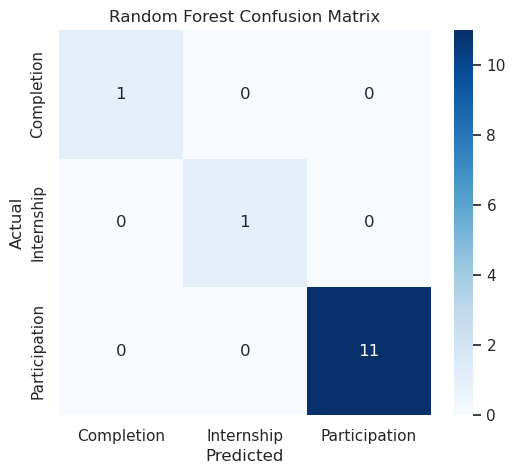

=== Linear Regression ===
MAE: 2.7328566760003855e-15
R2 Score: 1.0
=== Random Forest Regressor ===
MAE: 3.1792307692307755
R2 Score: 0.9243767650195448


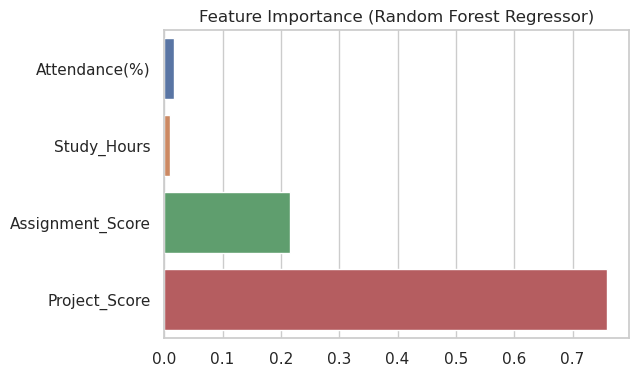

Dataset with predictions saved successfully!


In [1]:
# -----------------------------
# STUDENT PERFORMANCE ML PROJECT
# Notebook for Internship/Course Submission
# -----------------------------

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import random

# -----------------------------
# Step 2: Generate Dataset
# -----------------------------
student_ids = [f'25BFT458{str(i).zfill(3)}' for i in range(101, 162)]
np.random.seed(42)

attendance = np.random.randint(0, 101, size=len(student_ids))
study_hours = np.random.randint(0, 9, size=len(student_ids))
assignment_score = np.random.randint(40, 101, size=len(student_ids))
project_score = np.random.randint(40, 101, size=len(student_ids))

# Random AI effect for low-attendance students
for i in range(len(student_ids)):
    if attendance[i] < 70:
        if random.random() < 0.15:
            project_score[i] = min(project_score[i] + np.random.randint(5, 15), 100)

final_score = (0.4*assignment_score + 0.6*project_score).round(1)

certificate_type = []
for i in range(len(student_ids)):
    if attendance[i] == 0:
        certificate_type.append("None")
    elif attendance[i] >= 70:
        if assignment_score[i] >= 70 and project_score[i] >= 70:
            certificate_type.append("Internship")
        else:
            certificate_type.append("Completion")
    else:
        certificate_type.append("Participation")

# Create DataFrame
data = pd.DataFrame({
    "Student_ID": student_ids,
    "Attendance(%)": attendance,
    "Study_Hours": study_hours,
    "Assignment_Score": assignment_score,
    "Project_Score": project_score,
    "Final_Score": final_score,
    "Certificate_Type": certificate_type
})

data.to_csv("student_ml_dataset.csv", index=False)
print("Dataset created successfully!")
data.head(10)

# -----------------------------
# Step 3: Exploratory Data Analysis (EDA)
# -----------------------------
sns.set(style="whitegrid")

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data[['Attendance(%)','Study_Hours','Assignment_Score','Project_Score','Final_Score']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Attendance vs Final_Score
plt.figure(figsize=(8,5))
sns.scatterplot(x='Attendance(%)', y='Final_Score', data=data, hue='Certificate_Type', palette='Set2')
plt.title("Attendance vs Final Score")
plt.show()

# Study Hours vs Final_Score
plt.figure(figsize=(8,5))
sns.scatterplot(x='Study_Hours', y='Final_Score', data=data, hue='Certificate_Type', palette='Set1')
plt.title("Study Hours vs Final Score")
plt.show()

# Certificate distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Certificate_Type', data=data, palette='pastel')
plt.title("Certificate Type Distribution")
plt.show()

# -----------------------------
# Step 4: Preprocessing for ML
# -----------------------------
X = data[['Attendance(%)','Study_Hours','Assignment_Score','Project_Score']]
y_class = data['Certificate_Type']

# Encode target for classification
le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)

# Regression target
y_reg = data['Final_Score']

# Split data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class_encoded, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# -----------------------------
# Step 5: Classification Models
# -----------------------------

# Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_class, y_train_class)
y_pred_log = log_reg.predict(X_test_class)

print("=== Logistic Regression Classification ===")
print("Accuracy:", accuracy_score(y_test_class, y_pred_log))
print(classification_report(y_test_class, y_pred_log, target_names=le.classes_))

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_class, y_train_class)
y_pred_dt = dt.predict(X_test_class)

print("=== Decision Tree Classification ===")
print("Accuracy:", accuracy_score(y_test_class, y_pred_dt))
print(classification_report(y_test_class, y_pred_dt, target_names=le.classes_))

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_class, y_train_class)
y_pred_rf = rf.predict(X_test_class)

print("=== Random Forest Classification ===")
print("Accuracy:", accuracy_score(y_test_class, y_pred_rf))
print(classification_report(y_test_class, y_pred_rf, target_names=le.classes_))

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test_class, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# -----------------------------
# Step 6: Regression Models
# -----------------------------

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_lr = lr.predict(X_test_reg)

print("=== Linear Regression ===")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_lr))
print("R2 Score:", r2_score(y_test_reg, y_pred_lr))

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

print("=== Random Forest Regressor ===")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_rf_reg))
print("R2 Score:", r2_score(y_test_reg, y_pred_rf_reg))

# Feature Importance (Random Forest Regressor)
importances = rf_reg.feature_importances_
feature_names = X.columns
plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest Regressor)")
plt.show()

# -----------------------------
# Step 7: Save Dataset with Predictions
# -----------------------------
data['Predicted_Certificate_RF'] = le.inverse_transform(rf.predict(X))
data['Predicted_Final_Score_RF'] = rf_reg.predict(X).round(1)
data.to_csv("student_ml_dataset_with_predictions.csv", index=False)
print("Dataset with predictions saved successfully!")
